# Chapter One : The Probability Zoo

## Introduction

In [1]:
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

**TO DO**

## Core Terms

**TO DO**

## The Gaussian Distribution

### The Lowdown

The Gaussian distribution, also known as the Normal distribution, is the most well-known probability distribution. It is described by two parameters, a mean parameter $\mu$ and a standard deviation parameter $\sigma$. The mean parameter determines the expected value of the data $X$ : $E\left(X\right) = \mu$. The standard deviation $\sigma$ determines how dispersed the data is around the mean.

**Properties to note**:
- The distribution is continuous, meaning the data can cover any real number (positive and negative).
- For the normal distribution, the **mean** is also the **mode** and **median** of the distribution.
- The distribution tails die off quickly - as we go further away from the mean, the probability of $x$ decreases rapidly.

**The pdf formula**:
- $p\left(X=x\right) = \frac{1}{\sqrt{2\pi\sigma^{2}}}\exp\left(-\frac{1}{2}\frac{\left(x-\mu\right)^{2}}{\sigma^{2}}\right)$

**Notation**:
- $\mathcal{N}(0,1)$ means a Normal distribution with $\mu=0$ and $\sigma=1$

### Python Implementation

**Suggestion** : play with the $\mu$ and $\sigma$ values below and see the effects on the probability density plot.

In [2]:
µ = 0
σ = 1

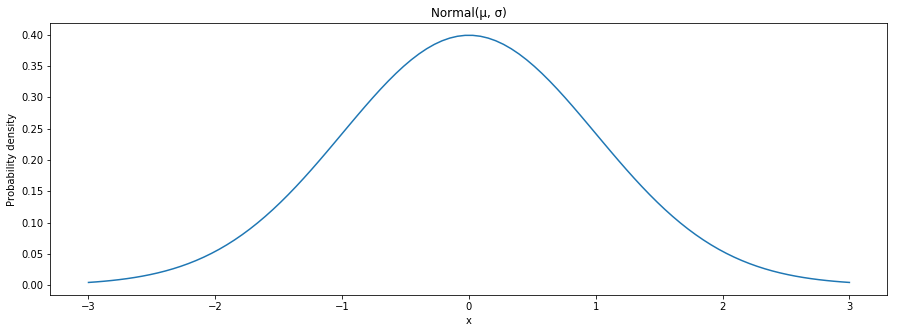

In [3]:
plt.figure(figsize=(15, 5));
x_values = np.linspace(µ - 3*σ, µ + 3*σ, 100); # we will plot 3 standard deviations of x
plt.title('Normal(%s, %s)' % ('µ', 'σ'));
plt.ylabel("Probability density")
plt.xlabel("x")
plt.plot(x_values, mlab.normpdf(x_values, µ, σ));

### Sports Example: the NFL Points Spread

Many authors such as Stern (x) and Glickman(x), have assumed the **point spread** for NFL games is normally distributed. Let's have a look and find out. First, let's import historical data from peyton and construct a points spread variable:

In [4]:
import peyton

In [5]:
throne = peyton.Throne(username='RJT1990', token="be3b4366-6ba3-4773-9d0e-39b2d83c10e8")
throne.competition('NFL').get_historical_data()
my_historical_data = throne.competition.historical_data

point_spread = my_historical_data['team_1_score'] - my_historical_data['team_2_score']

Now let's calculate the empirical mean and standard deviation using numpy:

In [6]:
µ = np.mean(point_spread)
σ = np.std(point_spread)
games = point_spread.shape[0]

print('The mean is %s and the standard deviation is %s, for a %s game sample.' % (µ, σ, games))

The mean is 2.5021459227467813 and the standard deviation is 14.887741439870034, for a 2330 game sample.


**But is the normal distribution a good assumption?**

To find out we are first going to plot the data to get an idea of its behaviour. 

First we'll plot an empirical histogram alongside a theoretical pdf using the parameters we calculated above:

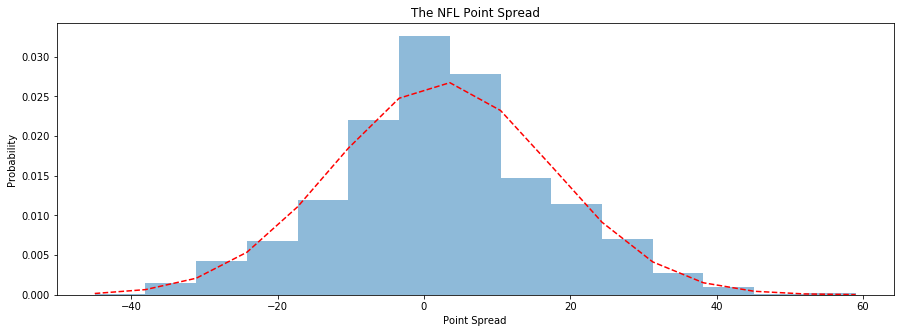

In [7]:
plt.figure(figsize=(15, 5));
x_values = np.linspace(µ - 3*σ, µ + 3*σ, 100); # we will plot 3 standard deviations of x
plt.title('The NFL Point Spread');
plt.ylabel("Probability density")
plt.xlabel("x")

n_bins = 15 # bins for the histogram
n, bins, patches = plt.hist(point_spread, n_bins, normed=1, alpha=0.5)
y = mlab.normpdf(bins, µ, σ) # plot the pdf
plt.plot(bins, y, 'r--'); # plot the empirical histogram
plt.xlabel('Point Spread');
plt.ylabel('Probability');

From this plot, normality does not appear to be a terrible assumption, although there appears to be a bit of skew. Let's confirm this by calculating the **empirical skewness**:

In [8]:
print(stats.skew(point_spread))

0.07899258906903703


There is a positive skew, implying there is more weight in the right tail of the distribution. Intuitively this means there are more extreme home wins then more extreme away wins in the NFL.

Next we can plot a **QQ plot** which will plot the theoretical quantiles of a Normal distribution alongside the empirical quantiles of the point spread data:

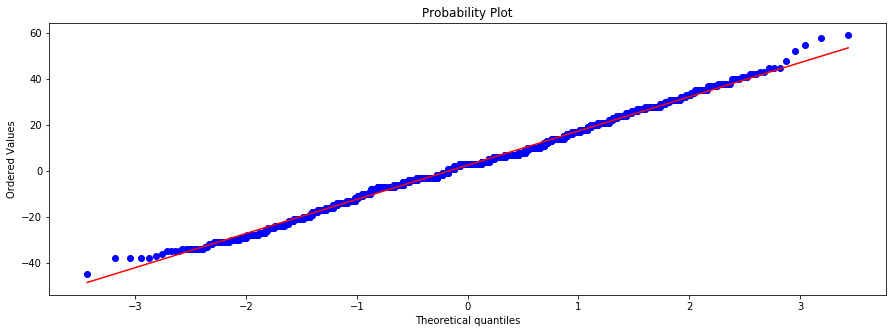

In [9]:
plt.figure(figsize=(15, 5))
stats.probplot(point_spread, plot=plt);

It appears there is more weight in the right tail than a Normal distribution - confirming our observation about skewness in the distribution.

We can also do a test for normality. The **Shapiro-Wilk test** allows us to test the null hypothesis of normality. A more general test for testing distributional differences is the **Kolmogorov-Smirnov test**, although it has less power than the **Shapiro-Wilk test** (the price for generality). We can perform the Shapiro-Wilk test as follows using scipy:

In [10]:
test_statistic, p_value = stats.shapiro(point_spread)
print('The test statistic is %s and the P-value is %s, for a %s game sample.' % (test_statistic, p_value, games))

The test statistic is 0.9947707056999207 and the P-value is 2.547893132032186e-07, for a 2330 game sample.


The P-value suggests that we reject the null hypothesis of non-normality. We should be careful with relying on tests too much however - with enough data we will always have enough evidence to reject normality in some way. For this reason, it is a complementary tool we use alongside distributional plots.

**Normality Conclusions**

It appears there is more positive skewness in the NFL point spread data then could be explained with a Normal distribution. Some points:

- **We are looking at aggregate data** - it could be that in the population of games, there are more games with extreme home favorites - Normality may still be a valid assumption for modelling individual games


- **Alternative distributions to consider** - the skewed Normal distribution is a distribution that can model skewness as well as the mean and standard deviation of a distribution, if we wanted to model this problem further.


- **Continuity is a practical assumption** - the point spread is actually integer data, and ties are technically possible. However, we can still use normality as a simplifying assumption to model the probability of outcomes - "all models are wrong, some are useful".

**The Normal CDF Trick**

The normality assumption lends itself to a very convenient trick for converting point spreads into probabilities of outcomes. 

Assume that we have modelled a game between the **New England Patriots** at home to the **Denver Broncos** as having a point spread of +7. 

Using a measure of standard deviation, we can use the Normal CDF formula to calculate the probability that the New England Patriots have a point spread greater than $0$ (the probability of winning):

In [11]:
µ = 7
σ = np.std(point_spread) # one way of modelling σ; use empirical standard deviation of point spread

pats_win_prob = 1.0 - stats.norm.cdf(0, µ, σ)

print('The probability of the Patriots winning with a point spread of %s is %s' % (µ, pats_win_prob))

The probability of the Patriots winning with a point spread of 7 is 0.680888749961


Let's plot this so we can see it visually:

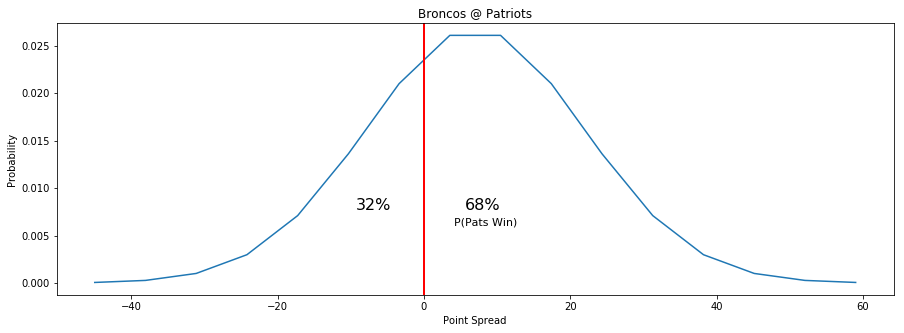

In [12]:
plt.figure(figsize=(15, 5));
x_values = np.linspace(µ - 3*σ, µ + 3*σ, 100); # we will plot 3 standard deviations of x
plt.title('Broncos @ Patriots');
plt.ylabel("Probability density")
plt.xlabel("x")

n_bins = 15 # bins for the histogram
y = mlab.normpdf(bins, µ, σ) # plot the pdf
plt.plot(bins, y); # plot the empirical histogram
plt.axvline(x=0, ymin=0.0, ymax = 2, linewidth=2, color='r')
plt.annotate('P(Pats Win)', xy=(0.55, 0.25), xycoords='axes fraction', fontsize=11,
        horizontalalignment='right', verticalalignment='bottom')
plt.annotate('68%', xy=(0.53, 0.3), xycoords='axes fraction', fontsize=16,
        horizontalalignment='right', verticalalignment='bottom')
plt.annotate('32%', xy=(0.4, 0.3), xycoords='axes fraction', fontsize=16,
        horizontalalignment='right', verticalalignment='bottom')
plt.xlabel('Point Spread');
plt.ylabel('Probability');

## The Poisson Distribution

### The Lowdown

Often in sports we deal with **count data** : count data can only take non-negative integer values $(0, 1, 2, \dots)$. The fundamental distribution for count data is the **Poisson** distribution. The Poisson distribution has a single rate parameter $\lambda$ which controls the mean and variance of the distribution. The expected value of the count data $X$ is $E\left(X\right) = \lambda$.

**Properties to note**:
- **The distribution covers discrete, positive values** - negative values are impossible, as are non-integer values, meaning we are dealing with a probability mass function (pmf) as opposed to a continuous probability density function (pdf).


- **The variance is the same as the mean** - this can be a restrictive assumption if there is overdispersion in the distribution (more weight in the tails of the distribution), which is often the case in sports data.


- **Zeros may be underestimated** - often count data has, empirically, more zero values than can be explained by a Poisson distribution. 

**The pmf formula**:
- $p\left(X=x\right) = \frac{\lambda^{x}\exp\left(-\lambda\right)}{x!}$

**Notation**:
- $Poisson(2.4)$ means a Poisson distribution with $\lambda=2.4$

### Python Implementation

**Suggestion** : play with the $\lambda$ value below and see the effects on the probability mass plot.

In [13]:
λ = 2.4 # lambda can be a real number, e.g. 2.4, but the realized data will always be positive integers

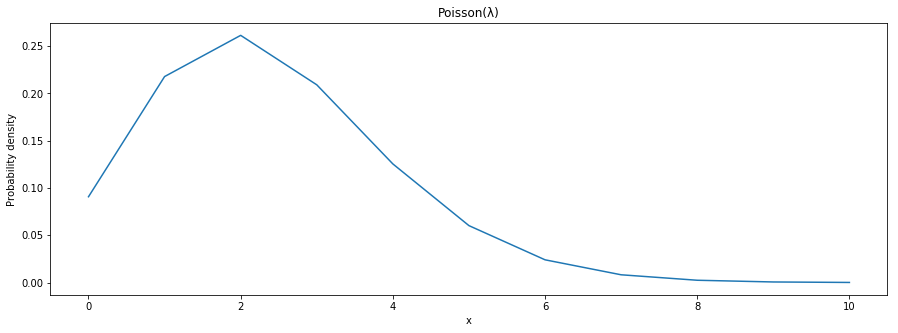

In [14]:
plt.figure(figsize=(15, 5));
x_values = np.linspace(0, 10, 11);
plt.title('Poisson(%s)' % ('λ'));
plt.ylabel("Probability density")
plt.xlabel("x")
plt.plot(x_values, stats.poisson.pmf(x_values, mu=λ));

### Sports Example: Premier League Goals

Many authors such as Maher (1982) and Dixon & Coles (1992), have assumed Poisson-based distributions for goals in the English Premier League. Let's have a look and find out if this is a good assumption. First, let's import historical data from peyton:

In [15]:
throne = peyton.Throne(username='RJT1990', token="be3b4366-6ba3-4773-9d0e-39b2d83c10e8")
throne.competition('English Premier League').get_historical_data()
my_epl_data = throne.competition.historical_data

Let's calculate the mean for the home and away team goals:

In [16]:
home_goals = my_epl_data['team_1_score']
away_goals = my_epl_data['team_2_score']
λ1 = np.mean(home_goals)
λ2 = np.mean(away_goals)
games = point_spread.shape[0]

print('The mean of home team goals is %s and the mean for away team goals is %s, for a %s game sample.' 
      % (λ1, λ2, games))

The mean of home team goals is 1.535111281657713 and the mean for away team goals is 1.1310437452033768, for a 2330 game sample.


There appears to be a home field advantage as $\lambda_{1} > \lambda_{2}$. Next let's plot the empirical histogram against theoretical Poisson pdfs:

In [17]:
def plot_poisson_pdf(data, title="My Count Data", n_bins=10):
    λ = np.mean(data)
    x_values = np.linspace(0, 10, 11);

    plt.figure(figsize=(15, 5));
    plt.title(title);
    plt.ylabel("Probability density")
    plt.xlabel("x")
    n, bins, patches = plt.hist(data, n_bins, normed=1, alpha=0.5)
    plt.plot(x_values, stats.poisson.pmf(x_values, mu=λ), 'r--');
    plt.xlabel('Point Spread');
    plt.ylabel('Probability');

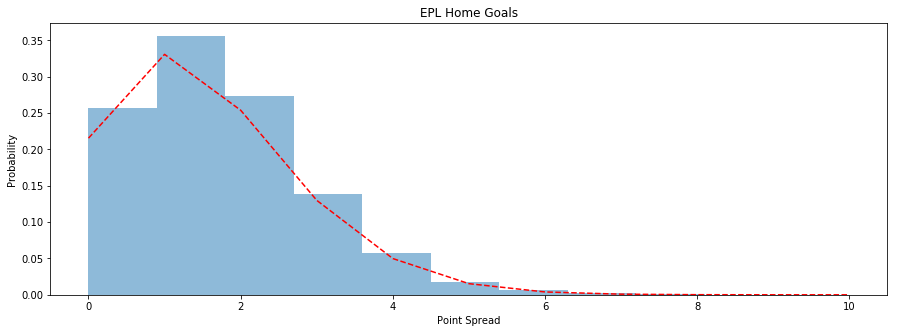

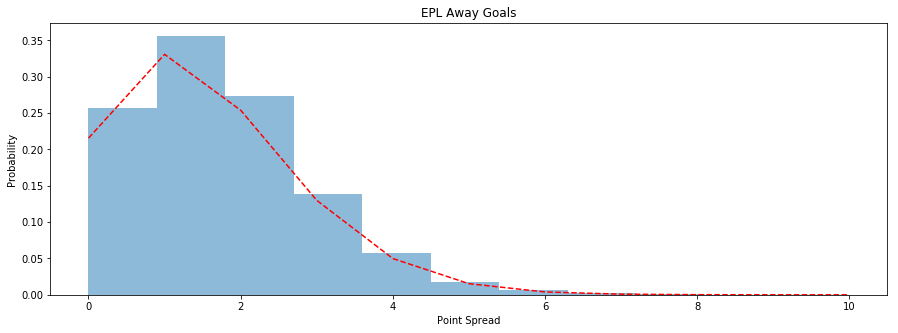

In [18]:
plot_poisson_pdf(data=home_goals, title="EPL Home Goals")
plot_poisson_pdf(data=home_goals, title="EPL Away Goals")

It appears that the Poisson distribution provides a reasonable fit to the data. We can also plot QQ plots with the Poisson as the theoretical distribution:

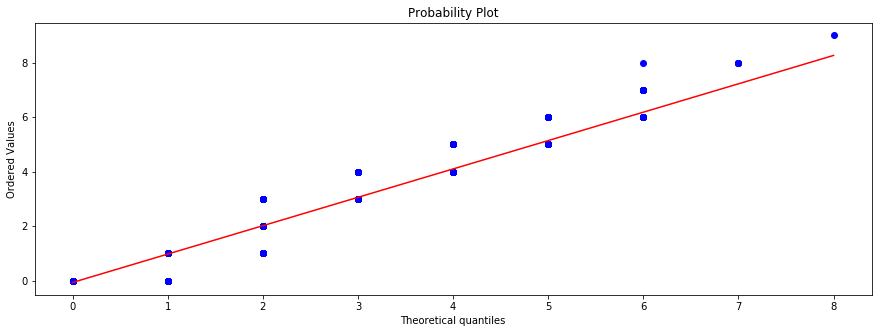

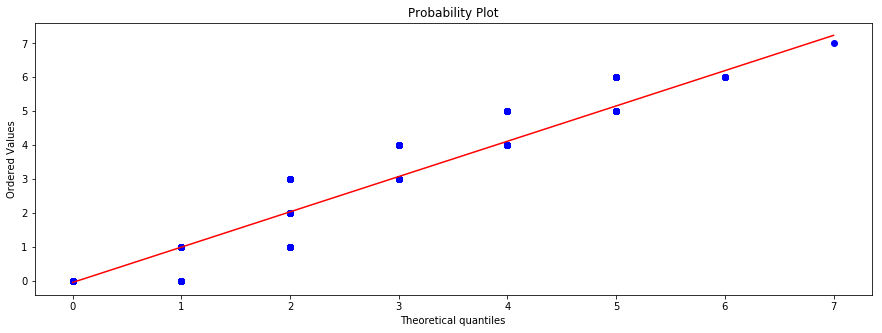

In [19]:
plt.figure(figsize=(15, 5))
stats.probplot(home_goals, dist='poisson', sparams=(λ1,), plot=plt);

plt.figure(figsize=(15, 5))
stats.probplot(away_goals, dist='poisson', sparams=(λ2,), plot=plt);

There appears to be some slight deviations from the Poisson pmf for 1 goal counts, and the Poisson distribution underestimates the number of 1s for both home and away goals. We can perform a $\chi^{2}$ **goodness of fit test** with the thereotical distribution as Poisson:

In [20]:
x_values = np.linspace(0, 10, 11)[:-1];

expected_freq_1 = stats.poisson.pmf(x_values, mu=λ1)
observed_freq_1 = np.bincount([int(goal) for goal in home_goals])/home_goals.sum()
test_statistic_1, p_value_2 = stats.chisquare(observed_freq_1, f_exp=expected_freq_1)

print('The test statistic is %s and the P-value is %s, for a %s game sample.' % (test_statistic_1, p_value_2, games))

x_values = np.linspace(0, 10, 11)[:-3];
expected_freq_2 = stats.poisson.pmf(x_values, mu=λ2)
observed_freq_2 = np.bincount([int(goal) for goal in away_goals])/away_goals.sum()
test_statistic_2, p_value_2 = stats.chisquare(observed_freq_2, f_exp=expected_freq_2)

print('The test statistic is %s and the P-value is %s, for a %s game sample.' % (test_statistic_2, p_value_2, games))

The test statistic is 0.125964102249 and the P-value is 0.999999928343, for a 2330 game sample.
The test statistic is 0.0208507067712 and the P-value is 0.999999990134, for a 2330 game sample.


There is insufficient evidence that the data does not have the given frequencies. We can also do a rule-of-thumb test for overdispersion suggested by Cameron and Trivedi (1990), which is that $\frac{Var(X)}{E(X)} > 2$:

In [21]:
home_overdispersion = np.var(home_goals)/np.mean(home_goals)
away_overdispersion = np.var(away_goals)/np.mean(away_goals)
print('Home Overdispersion is %s. Is this > 2? %s' % (home_overdispersion, home_overdispersion > 2))
print('Away Overdispersion is %s. Is this > 2? %s' % (away_overdispersion, away_overdispersion > 2))

Home Overdispersion is 1.108683244026604. Is this > 2? False
Away Overdispersion is 1.1283286042453065. Is this > 2? False


**Poisson Conclusions**

- It appears that the Poisson distribution is a good fit for home and away goals independently.


- However we have not yet looked at the **joint distribution** which is important for modelling draws; we cover this next.

### Getting Outcome Probabilities from the Joint PMF

Assume we had modelled goals for **Arsenal** vs **Manchester United** with two independent Poisson distributions as $\lambda_{1}=1.2$ and $\lambda_{2}=1.3$ respectively. We could obtain the outcome probabilities for the match as follows, with the functions:

In [22]:
λ1 = 1.2
λ2 = 1.3

def get_poisson_grid(lambda_1, lambda_2):
    x_values = np.linspace(0, 10, 11)
    home_goals = np.array([stats.poisson.pmf(x_values, mu=lambda_1)])
    away_goals = np.array([stats.poisson.pmf(x_values, mu=lambda_2)])
    grid = away_goals.T @ home_goals
    return grid / np.sum(grid) # ensure it adds to exactly 1 (ignoring very high scores)

def get_poisson_outcomes(lambda_1, lambda_2, pmf_grid=None):
    if pmf_grid is None:
        pmf_grid = get_poisson_grid(lambda_1, lambda_2)
    away_prob = np.tril(pmf_grid, k=-1).sum() 
    draw_prob = np.diag(pmf_grid).sum()
    home_prob = 1.0 - away_prob - draw_prob
    return home_prob, draw_prob, away_prob

Let's analyse these each in term. First we multiply the pmf of home and away goals together so that we obtain the probability of each score pair $(0, 0)$, $(0, 1)$, $(1, 0)$, and so on. Let's have a look at this grid:

In [23]:
score_grid = pd.DataFrame(get_poisson_grid(λ1, λ2))
score_grid

,0,1,2,3,4,5,6,7,8,9,10
0,8.208501e-02,9.850202e-02,5.910121e-02,2.364048e-02,7.092145e-03,1.702115e-03,3.404230e-04,5.835822e-05,8.753734e-06,1.167164e-06,1.400597e-07
1,1.067105e-01,1.280526e-01,7.683157e-02,3.073263e-02,9.219789e-03,2.212749e-03,4.425499e-04,7.586569e-05,1.137985e-05,1.517314e-06,1.820777e-07
2,6.936184e-02,8.323421e-02,4.994052e-02,1.997621e-02,5.992863e-03,1.438287e-03,2.876574e-04,4.931270e-05,7.396905e-06,9.862540e-07,1.183505e-07
3,3.005680e-02,3.606816e-02,2.164089e-02,8.656357e-03,2.596907e-03,6.232577e-04,1.246515e-04,2.136884e-05,3.205325e-06,4.273767e-07,5.128521e-08
4,9.768459e-03,1.172215e-02,7.033290e-03,2.813316e-03,8.439948e-04,2.025588e-04,4.051175e-05,6.944872e-06,1.041731e-06,1.388974e-07,1.666769e-08
5,2.539799e-03,3.047759e-03,1.828655e-03,7.314622e-04,2.194387e-04,5.266528e-05,1.053306e-05,1.805667e-06,2.708500e-07,3.611333e-08,4.333600e-09
6,5.502898e-04,6.603478e-04,3.962087e-04,1.584835e-04,4.754504e-05,1.141081e-05,2.282162e-06,3.912278e-07,5.868417e-08,7.824556e-09,9.389467e-10
7,1.021967e-04,1.226360e-04,7.358161e-05,2.943265e-05,8.829794e-06,2.119150e-06,4.238301e-07,7.265659e-08,1.089849e-08,1.453132e-09,1.743758e-10
8,1.660696e-05,1.992835e-05,1.195701e-05,4.782805e-06,1.434841e-06,3.443620e-07,6.887239e-08,1.180670e-08,1.771004e-09,2.361339e-10,2.833607e-11
9,2.398783e-06,2.878540e-06,1.727124e-06,6.908496e-07,2.072549e-07,4.974117e-08,9.948234e-09,1.705412e-09,2.558117e-10,3.410823e-11,4.092988e-12


Where each tile is the probability of an outcome. E.g the probability of a 1-1 score is:

In [24]:
print(score_grid.iloc[1, 1])

0.128052623376


To get home, draw and away probabilities, we need to sum the probabilities from the lower triangular, the diagonal and the upper triangular. We do this in the function *get_poisson_outcomes*:

In [25]:
outcomes = get_poisson_outcomes(λ1, λ2)
print('WIN PROBABILITIES - Arsenal: %s, Draw: %s, Manchester United: %s' % outcomes)

WIN PROBABILITIES - Arsenal: 0.34136208624, Draw: 0.26963353556, Manchester United: 0.3890043782


### Checking the Joint Distribution

We saw that for independent home and away goals, the Poisson distribution worked well. What about the joint distribution? Let's recalculate the mean goals and plot the mean score grid:

In [26]:
λ1 = np.mean(home_goals)
λ2 = np.mean(away_goals)

mean_score_grid = pd.DataFrame(get_poisson_grid(λ1, λ2))
mean_outcomes = get_poisson_outcomes(λ1, λ2)

print(mean_outcomes)

(0.4660409367491245, 0.25390231022070442, 0.28005675303017108)


Let's calculate the observed frequency grid (inefficiently):

In [27]:
observed_score_grid = np.zeros(shape=(11, 11))
for home_goal in range(11):
    for away_goal in range(11):
        observed_score_grid[away_goal, home_goal] = home_goals[(home_goals==home_goal) & (away_goals==away_goal)].count()
    
grid = observed_score_grid/observed_score_grid.sum()
observed_score_grid = pd.DataFrame(grid)
actual_outcomes = get_poisson_outcomes(0.0, 0.0, pmf_grid=grid)

print(actual_outcomes)

(0.46527244819646962, 0.25422102839600924, 0.28050652340752114)


It appears we do not have significant draw bias from assuming independent Poisson distributions for this league. Let's look at the entire score grid bias:

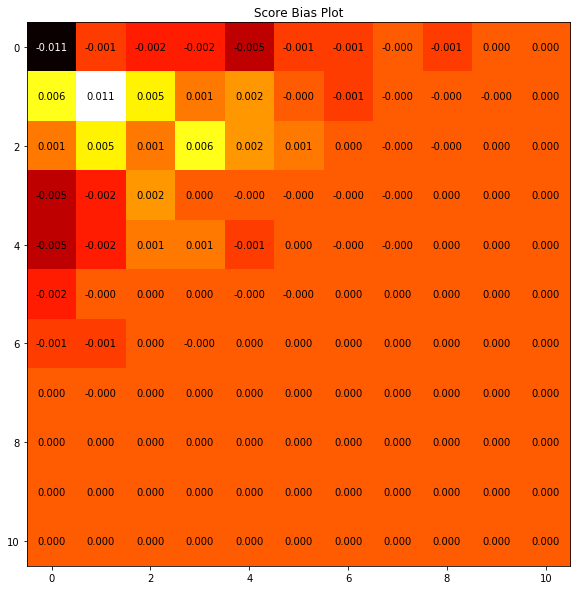

In [28]:
difference = np.round(mean_score_grid - observed_score_grid, 3)
plt.figure(figsize=(15, 10))
plt.title("Score Bias Plot")
plt.imshow(difference, cmap='hot', interpolation='nearest')
for y in range(difference.shape[0]):
    for x in range(difference.shape[1]):
        if y == 0 and x == 0:
            plt.text(x, y, '%.3f' % difference.iloc[y, x], horizontalalignment='center',
                     verticalalignment='center', color='white')          
            continue
        
        plt.text(x, y, '%.3f' % difference.iloc[y, x], horizontalalignment='center', verticalalignment='center')

The main bias we appear to see seems to be an underestimation of the 0-0 result and an overestimation of the 1-1 result. This bias was discussed by Dixon and Coles (1996) who proposed a correction to address this bias.